Effective charge of HF is -0.4688158269027078 atomic units


/Users/jfoley19/Code/CompChem2024/PROJECT/morse.py:264: SyntaxWarning: invalid escape sequence '\h'
  """ Function to compute the matrix elements
/Users/jfoley19/Code/CompChem2024/PROJECT/morse.py:286: SyntaxWarning: invalid escape sequence '\o'
  """ Function to compute the matrix elements
/Users/jfoley19/Code/CompChem2024/PROJECT/morse.py:308: SyntaxWarning: invalid escape sequence '\h'
  """ Function to compute the matrix elements


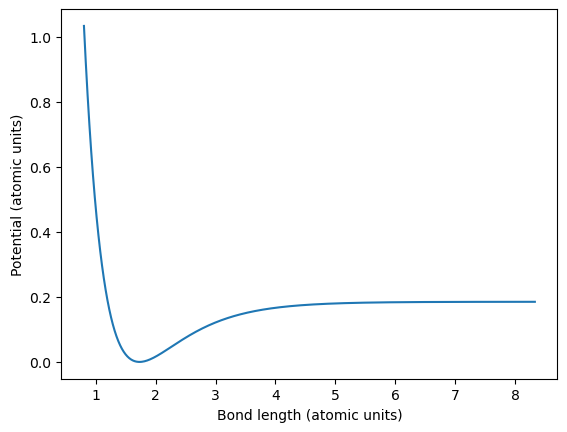

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from morse import Morse


# Atom masses in atomic mass units
mH, mF = 1., 19.

# Equilibrium bondlength in meters
re = 0.915801e-10

# dipole moment of HF at the equilibrium bondlength
dipole_au = -0.8113388


# potential energy at minimum, ok to set at zero
Te = 0

# Morse parameters in atomic units 
we_au, wexe_au = 0.01911889333688861, 0.0004944018798851136
# Morse parameters in wavenumbers
we, wexe = 4196.112054123941, 108.50866999528301

# create Morse object 
X = Morse(mH, mF, we, wexe, re, Te, dipole_au, 0.001)

# create Morse grid - will make grids in SI (self.r) and atomic units (self.r_au)
X.make_rgrid()

# create Morse potential on SI grid, will make potential in SI (self.V) and atomic units (self.V_au)
X.V = X.Vmorse(X.r)

print(F'Effective charge of HF is {X.q_au} atomic units')


# plot Morse potential in atomic units
plt.plot(X.r_au, X.V_au)
plt.xlabel("Bond length (atomic units)")
plt.ylabel("Potential (atomic units)")
plt.show()

Norm in au is 1.0
Norm in si is 1.0


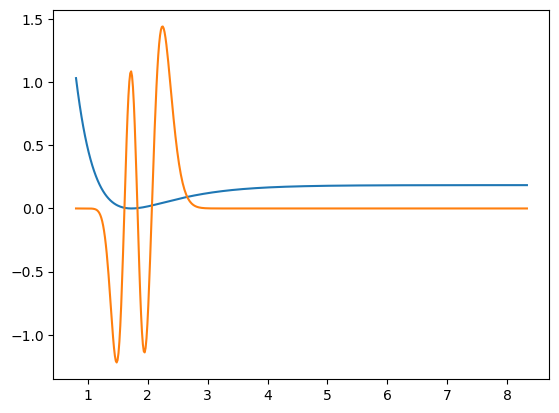

In [2]:
# calculate an eigenstate of the Morse oscillator
# self.psi_si will be normalized in SI units 
# self.psi_au will be normalized in atomic units

# calculate psi_20
psi = X.calc_psi_z(3)

# check normalization in SI units
norm_si = np.trapz(X.psi_si ** 2, X.r)

# check normalization in atomic units
norm_au = np.trapz(X.psi_au ** 2,  X.r_au)
print(F'Norm in au is {norm_au}')
print(F'Norm in si is {norm_si}')

# plot the normalized eigenfunction in atomic units against the potential in atomic units
plt.plot(X.r_au, X.V_au)
plt.plot(X.r_au, X.psi_au)
#plt.plot(X.r_au, X.r_au-X.r_eq_au)
plt.show()

In [3]:
print(X.compute_Morse_transition_au(0, 1))
print(X.compute_Morse_transition_wn(0, 1))

print(X.compute_coupling_element_p_dot_A(0, 1, 1, 2))
x_01 = X.position_matrix_element(0,1)
deltaE_01 = X.compute_Morse_transition_au(1, 0)


print(F'charge: {X.q_au}')
print(F'A0: {X.A0_au}')
print(F'x_01: {x_01}')
print(F'dE_01: {deltaE_01}')

total_element = (0+1j) * X.q_au * deltaE_01 * np.sqrt(2) * X.A0_au * x_01
print(F'Expected element is {total_element}')
agrees = np.isclose(total_element, X.compute_coupling_element_p_dot_A(0, 1, 1, 2))
print(F' Agrees: {agrees}')

0.018130089577118386
3979.0947141333745
1.4960861820690777e-06j
charge: -0.4688158269027078
A0: 0.001
x_01: 0.12446275197081468
dE_01: -0.018130089577118386
Expected element is 1.496086182069078e-06j
 Agrees: True


Recall the three coupled Hamiltonians:
p dot A Hamiltonian,
\begin{equation}
    \hat{H}_{\rm p \cdot A} = \frac{\hat{p}^2}{2m} + V(\hat{x})  + \hbar \omega \hat{b}^{\dagger} \hat{b} -  \frac{z}{m} \hat{p} \cdot  {\bf A}_0 ( \hat{b}^{\dagger} + \hat{b}) + \frac{z^2}{2m}  {\bf A}_0^2 ( \hat{b}^{\dagger} + \hat{b})^2,
\end{equation}
the d dot E Hamiltonian,
\begin{equation}
    \hat{H}_{\rm d \cdot E} = \frac{\hat{p}^2}{2m} + V(\hat{x}) + \hbar \omega \hat{b}^{\dagger} \hat{b} + i\omega \hat{\mu} \cdot {\bf A}_0 ( \hat{b}^{\dagger} - \hat{b}) +\frac{\omega_{{\rm cav}}}{\hbar} ( \hat{\mu} \cdot {\bf A}_0)^2
\end{equation}
or the Pauli-Fierz (PF) Hamiltonian,
\begin{equation}
    \hat{H}_{\rm d \cdot E} = \frac{\hat{p}^2}{2m}+ V(\hat{x}) + \hbar \omega \hat{b}^{\dagger} \hat{b} - \omega \hat{\mu} \cdot {\bf A}_0 ( \hat{b}^{\dagger} + \hat{b}) +\frac{\omega_{{\rm cav}}}{\hbar} ( \hat{\mu} \cdot {\bf A}_0)^2
\end{equation}

The matter Hamiltonian terms $\frac{\hat{p}^2}{2m} + V(\hat{x})$ have been solved by either our Morse, quartic perturbation, or finite difference approach and our photon Hamiltonian term $\hbar \omega \hat{b}^{\dagger} \hat{b}$ is also already known.  We need to evaluate 
the additional coupling elements.  For the d.E and PF Hamiltonians, the coupling elements will involve matter matrix elements with of the form 
\begin{equation}
\langle \psi_i | \hat{\mu} | \psi_f \rangle = z \langle \psi_i | \hat{x} | \psi_f \rangle
\end{equation}
and the p.A Hamiltonian will have matrix elements of the form
\begin{equation}
\langle \psi_i | \hat{p} | \psi_f \rangle = i m \left(E_i - E_f \right) \langle \psi_i | \hat{x} | \psi_f \rangle
\end{equation}
where $E_n$ is the energy associated with matter state $n$, $m$ is the reduced mass, and $i$ is the imaginary unit.  Hence, we need to be able to compute matrix elements of the position operator with our matter states.  The following function will accomplish this.


In [4]:
X.photon_dim = 5
X.matter_dim = 5
X.build_basis()
print(X.basis)
print(len(X.basis))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
25


In [5]:
X.build_p_dot_A_Hamiltonian()

print(X.H_p_dot_A)
H_pda = X.H_p_dot_A
print(np.allclose(H_pda, H_pda.conj().T))

[[1.85008911e-02+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+1.05789268e-06j 0.00000000e+00-2.40030798e-07j
  0.00000000e+00+6.75109523e-08j 0.00000000e+00-2.21951292e-08j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 3.66309806e-02+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00-1.05789268e-06j
  0.00

In [6]:
from numpy import linalg as la
X.build_d_dot_E_Hamiltonian()
X.build_PF_Hamiltonian()
print(np.real(X.H_PF) * X.au_to_wn)
print((X.H_PF[1,1]-X.H_PF[0,0]) * X.au_to_wn)
print(X.omega_p * X.au_to_wn)


[[ 4.06047623e+03  1.11133095e-05  1.75627265e-05 -5.15168536e-06
   1.59654924e-06  5.63546078e-02  2.32180606e-01 -2.70787649e-02
   5.22388803e-03 -1.32632212e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.11133095e-05  8.03957098e+03  3.28334965e-05  2.89012732e-05
  -1.02064894e-05  2.32180606e-01  1.74069272e-01  3.32785192e-01
  -4.81894209e-02  1.08852292e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.75627265e-05  3.28334965e-05  1.18016484e+04  6.31857484e-05
   3.83688608e-05 -2.70787649e-02  3.32785192e-01  2.99732663e-01
   4.13228801e-01 -7.00720441e-02  0.0

In [7]:
X.A0_au = 0.001
X.build_PF_Hamiltonian()
print(X.H_matter * X.au_to_wn)
print(X.H_dse * X.au_to_wn)
print(X.H_coup * X.au_to_wn)
print(X.H_pho * X.au_to_wn)

[[ 2070.92885956     0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [    0.          6050.0235737      0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [    0.             0.          9812.10094784     0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.        

In [8]:
vals_PdA, vecs_PdA = la.eigh(X.H_p_dot_A)
vals_DdE, vecs_EdE = la.eigh(X.H_d_dot_E)
vals_PF, vecs_PF = la.eigh(X.H_PF)

In [9]:
print(vals_DdE[2]-vals_DdE[1])
print(vals_PdA[2]-vals_PdA[1])
print(vals_PF[2]-vals_PF[1])

2.115785368642098e-06
2.1157853685935257e-06
2.1157853686212813e-06


In [10]:
print(vals_DdE[0])
print(vals_PdA[0])
print(vals_PF[0])

0.01850089101847577
0.0185008910184765
0.01850089101847577


In [11]:

A_vals = [0, 0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.014, 0.016, 0.018, 0.02]
from matplotlib import pyplot as plt

pda_vals = np.zeros((11,4))
dde_vals = np.zeros((11,4))
pf_vals = np.zeros((11,4))

idx = 0
for Av in A_vals:
    X.A0_au = Av
    X.build_d_dot_E_Hamiltonian()
    X.build_p_dot_A_Hamiltonian()
    X.build_PF_Hamiltonian()
    vals_PdA, vecs_PdA = la.eigh(X.H_p_dot_A)
    vals_DdE, vecs_EdE = la.eigh(X.H_d_dot_E)
    vals_PF, vecs_PF = la.eigh(X.H_PF)
    pda_vals[idx,:] = vals_PdA[:4]
    dde_vals[idx,:] = vals_DdE[:4]
    pf_vals[idx,:] = vals_PF[:4]
    idx += 1

    
    


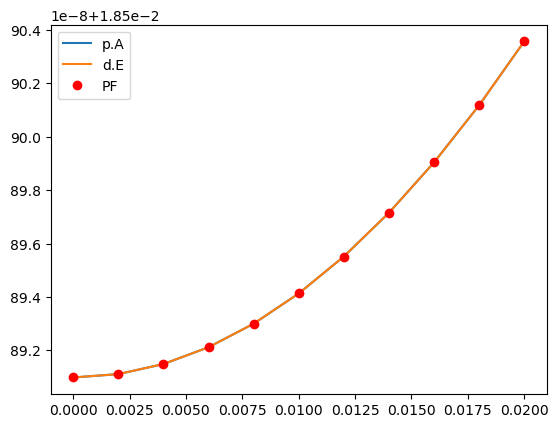

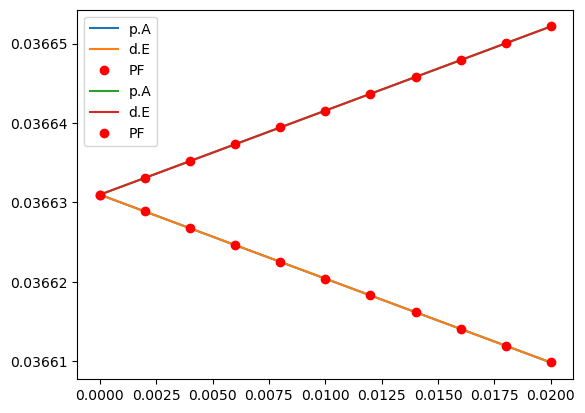

In [12]:
plt.plot(A_vals, pda_vals[:,0], label="p.A")
plt.plot(A_vals, dde_vals[:,0], label="d.E")
#plt.plot(A_vals, pf_vals[:,0])
plt.plot(A_vals, pf_vals[:,0], 'ro', label="PF")
#plt.plot(A_vals, pf_vals[:,2])
plt.legend()
plt.show()

plt.plot(A_vals, pda_vals[:,1], label="p.A")
plt.plot(A_vals, dde_vals[:,1], label="d.E")
plt.plot(A_vals, pf_vals[:,1], 'ro', label="PF")
plt.plot(A_vals, pda_vals[:,2], label="p.A")
plt.plot(A_vals, dde_vals[:,2], label="d.E")
plt.plot(A_vals, pf_vals[:,2], 'ro', label="PF")
#plt.plot(A_vals, pf_vals[:,2])
plt.legend()

plt.show()
